# Contents

* [Basic Usage](#Basic-Usage)
 - [dtw distance](#dtw-distance)
 - [alignment path](#alignment-path)
 - [warp one to the other](#warp-one-to-the-other)  
 regarding how to obtain warping path of X with fixed Y and vice versa.
* [Advanced Usage](#Advanced-Usage)
 - [global constraint](#global-constraint)  
 regarding how to run dtw with global constrained which is also called windowing.
 - [local constraint](#local-constraint)  
 regarding how to run dtw with local constrained which is also called step pattern.
 - [partial alignment](#partial-alignment)  
 regarding how to perform partial matching algorithm.
 - [use other metric](#use-other-metric)  
 how to use other pair-wise distance metric (default is euclidean).
 - [use pre-computed distance matrix](#use-pre-computed-distance-matrix)  
 how to run dtw with given pre-computed distance matrix, not with X and Y.
 - [use user-defined constraints](#use-user-defined-constraints)  
 how to define user constraint and to use.
* [Utilities](#Utilities)

# Basic Usage

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from dtwalign import dtw

(-1, 3)

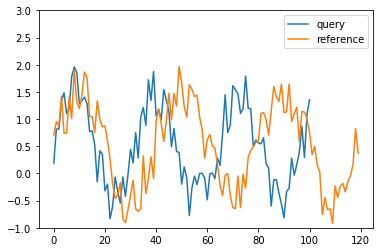

In [2]:
np.random.seed(1234)
# test data
x = np.sin(2*np.pi*3.1*np.linspace(0,1,101))
x += np.random.rand(x.size)
y = np.sin(2*np.pi*3*np.linspace(0,1,120))
y += np.random.rand(y.size)

plt.plot(x,label="query")
plt.plot(y,label="reference")
plt.legend()
plt.ylim(-1,3)

In [3]:
# run DTW
"""
Note: The first run takes a few seconds for jit compilation.
"""
res = dtw(x,y)

### dtw distance

In [4]:
# dtw distance
print("dtw distance: {}".format(res.distance))
print("dtw normalized distance: {}".format(res.normalized_distance))

"""
if you want to calculate only dtw distance (i.e. no need to gain alignment path),
give 'distance_only' argument as True (it makes faster).
"""
#res = dtw(x,y,distance_only=True)

dtw distance: 30.048812654583166
dtw normalized distance: 0.13596747807503695


"\nif you want to calculate only dtw distance (i.e. no need to gain alignment path),\ngive 'distance_only' argument as True (it makes faster).\n"

### alignment path

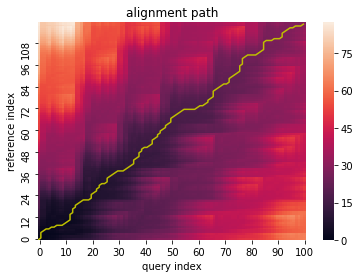

In [5]:
# visualize alignment path with cumsum cost matrix
res.plot_path()

(-1, 3)

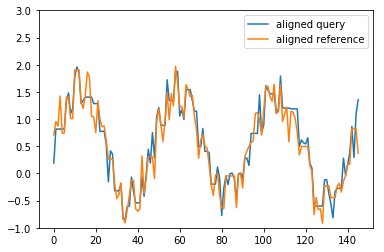

In [6]:
# warp both x and y by alignment path
x_path = res.path[:,0]
y_path = res.path[:,1]
plt.plot(x[x_path],label="aligned query")
plt.plot(y[y_path],label="aligned reference")
plt.legend()
plt.ylim(-1,3)

### warp one to the other

(-1, 3)

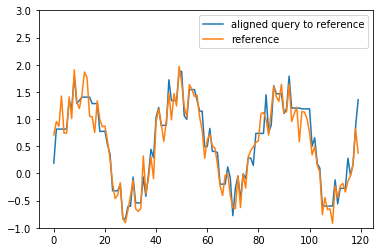

In [7]:
# warp x to y
x_warping_path = res.get_warping_path(target="query")
plt.plot(x[x_warping_path],label="aligned query to reference")
plt.plot(y,label="reference")
plt.legend()
plt.ylim(-1,3)

(-1, 3)

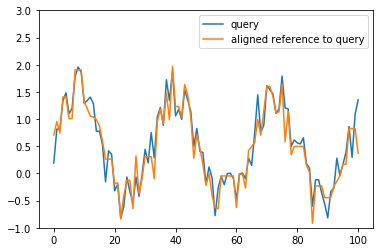

In [8]:
# warp y to x
y_warping_path = res.get_warping_path(target="reference")
plt.plot(x,label="query")
plt.plot(y[y_warping_path],label="aligned reference to query")
plt.legend()
plt.ylim(-1,3)

# Advanced Usage

### global constraint

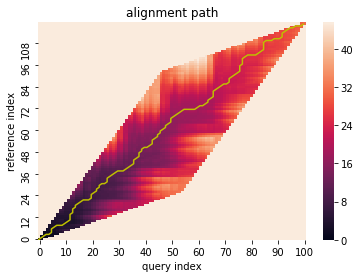

In [9]:
# run DTW with Itakura constraint
res = dtw(x,y,window_type="itakura")
# visualize alignment path with cumsum cost matrix
res.plot_path()

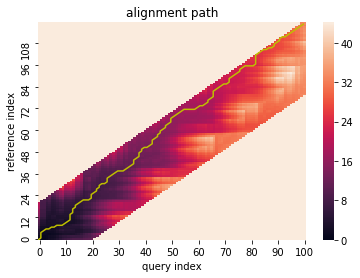

In [10]:
# run DTW with Sakoechiba constraint
res = dtw(x,y,window_type="sakoechiba",window_size=20)
# visualize alignment path with cumsum cost matrix
res.plot_path()

### local constraint

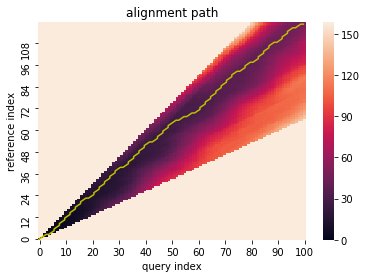

In [11]:
# run DTW with symmetricP2 pattern
res = dtw(x,y,step_pattern="symmetricP2")
# visualize alignment path with cumsum cost matrix
res.plot_path()

### partial alignment

(-1, 3)

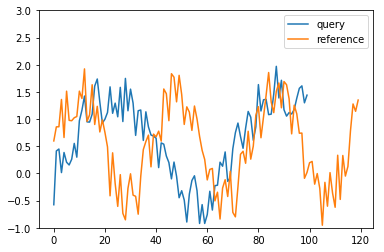

In [12]:
# test data
x_partial = np.sin(2*np.pi*3*np.linspace(0.3,0.8,100))
x_partial += np.random.rand(x_partial.size)
y_partial = np.sin(2*np.pi*3.1*np.linspace(0,1,120))
y_partial += np.random.rand(y_partial.size)

plt.plot(x_partial,label="query")
plt.plot(y_partial,label="reference")
plt.legend()
plt.ylim(-1,3)

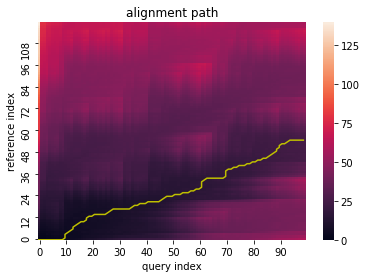

In [13]:
# open end
res = dtw(x_partial,y_partial,open_end=True)
res.plot_path()

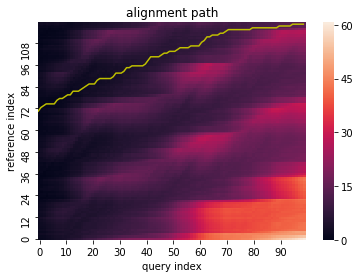

In [14]:
# open begin
res = dtw(x_partial,y_partial,step_pattern="asymmetric",open_begin=True)  # open-begin requires "N" normalizable pattern
res.plot_path()

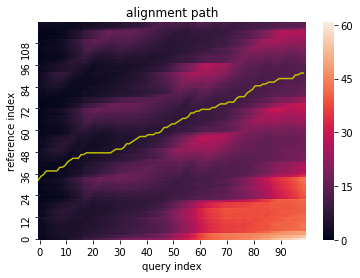

In [15]:
# open end and open begin
res = dtw(x_partial,y_partial,step_pattern="asymmetric",open_begin=True,open_end=True)
res.plot_path()

### use other metric

In [16]:
"""
you can choose arbitrary metric in scipy.spatial.distance.cdist
"""
res = dtw(x,y,dist="minkowski")

"""
arbitrary function which returns distance value between x and y is also available
"""
res = dtw(x,y,dist=lambda x,y: np.abs(x-y))

### use pre-computed distance matrix

In [17]:
# calculate pair-wise distance matrix in advance
from scipy.spatial.distance import cdist
X = cdist(x[:,np.newaxis],y[:,np.newaxis],metric="euclidean")

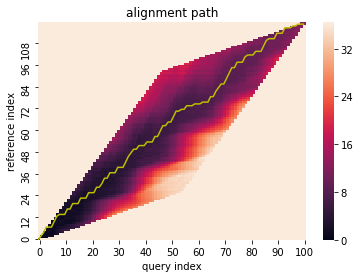

In [18]:
"""
if you want to run dtw from distance matrix, use "dtw_from_distance_matrix" function
"""
from dtwalign import dtw_from_distance_matrix
res = dtw_from_distance_matrix(X,window_type="itakura",step_pattern="typeIVc")
res.plot_path()

### use user-defined constraints

In [19]:
# import lower dtw interface
from dtwalign import dtw_low

# import user-defined window and step-pattern
from dtwalign.window import UserWindow
from dtwalign.step_pattern import UserStepPattern

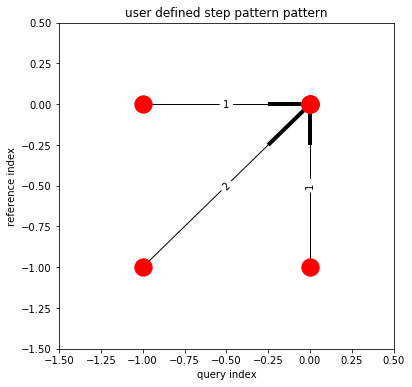

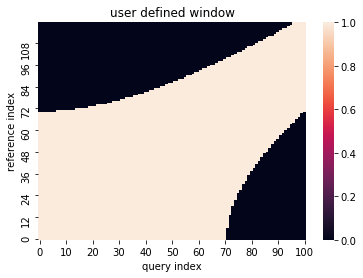

In [20]:
# define local constraint(step pattern)
pattern_info = [
                    dict(
                        indices=[(-1,0),(0,0)],
                        weights=[1]
                    ),
                    dict(
                        indices=[(-1,-1),(0,0)],
                        weights=[2]
                    ),
                    dict(
                        indices=[(0,-1),(0,0)],
                        weights=[1]
                    )
                ]
user_step_pattern = UserStepPattern(pattern_info=pattern_info,normalize_guide="N+M")

# define global constraint(window)
user_window = UserWindow(X.shape[0],X.shape[1],win_func=lambda i,j: np.abs(i**2-j**2) < 5000)

# plot
user_step_pattern.plot()
user_window.plot()

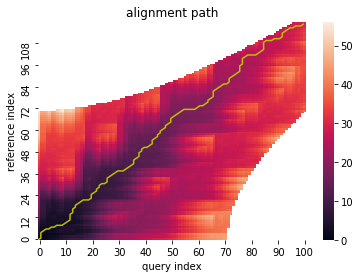

In [21]:
# run
from dtwalign.window import NoWindow
res = dtw_low(X,window=user_window,pattern=user_step_pattern)
res.plot_path()

# Utilities

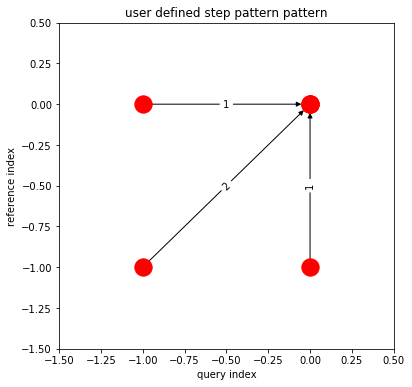

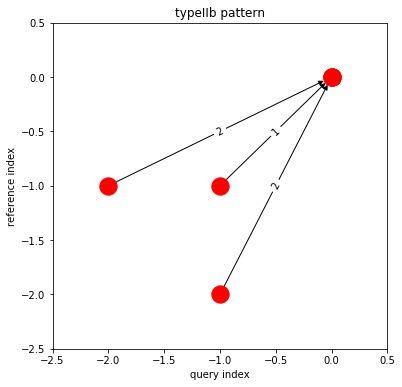

In [22]:
# visualize local constraint (step pattern)
res.plot_pattern() # from result object

from dtwalign.step_pattern import TypeIIb
TypeIIb().plot() # from step pattern object

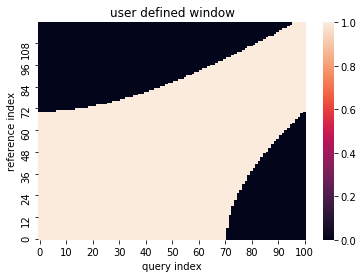

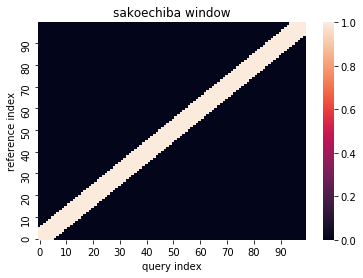

In [23]:
# visualize global constraint
res.plot_window() # from result object

from dtwalign.window import SakoechibaWindow
SakoechibaWindow(100,100,5).plot()  # from window object

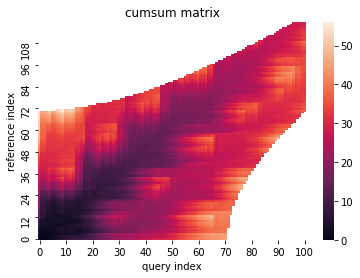

In [24]:
# plot cumsum cost matrix only
res.plot_cumsum_matrix()

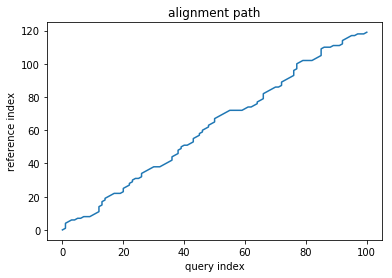

In [25]:
# plot path only
res.plot_path(with_=None)